In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import fiona as f
import pyogrio as po

In [4]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

C:\Users\leebj\AppData\Local\Temp\ipykernel_3880\122148680.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [5]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries.head()

C:\Users\leebj\AppData\Local\Temp\ipykernel_3880\1493347040.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


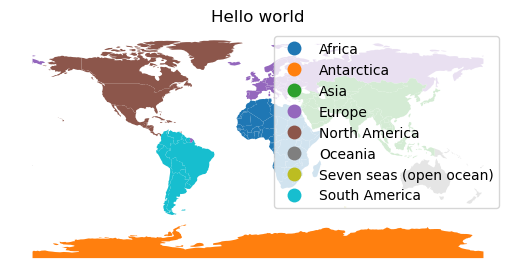

In [8]:
# 시각화
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("Hello world")
ax.set_axis_off()
plt.show()

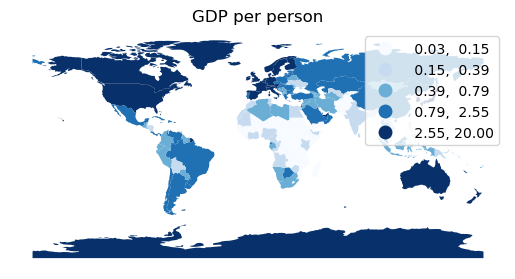

In [10]:
# 1인당 GDP연산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("GDP per person")
plt.show()

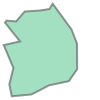

In [14]:
korea_geometry = countries[countries.name == "South Korea"].geometry
korea_geometry.squeeze()

C:\Users\leebj\AppData\Local\Temp\ipykernel_3880\764575621.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  korea_centroid = korea_geometry.centroid.squeeze()


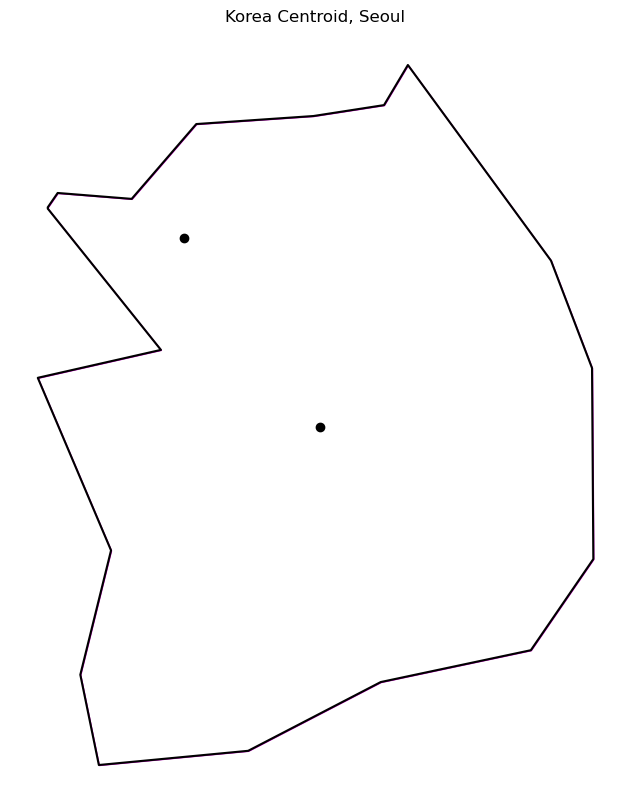

In [17]:
korea_boundary = korea_geometry.boundary.squeeze()
korea_centroid = korea_geometry.centroid.squeeze()
seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze()

base = countries[countries.name == "South Korea"].plot(
    figsize=(10, 10), color="w", edgecolor="m")
ax = gpd.GeoSeries([korea_boundary, korea_centroid, seoul]).plot(ax=base, color="k", edgecolor="k")
ax.set_title("Korea Centroid, Seoul")
ax.set_axis_off()
plt.show()